# **Variables by Impact**

## Objectives

* To answer Business Requirement 1:
  * The client is interested in discovering how house attributes correlate with sale prices. Therefore, the client expects data visualizations of the correlated variables against the sale price.

## Inputs

* inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv

## Outputs

* Generate code that answers business requirement 1 and can be used to build a streamlit app.

## Additional Comments

* Some of the data will need to be changed/transformed in order to run correlation studies. 
* null values will need to be reassigned.


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML'

# Section 1 - Load in the Data

Section 1 content

In [4]:
import pandas as pd
df = (pd.read_csv("/workspace/PP5-ML/inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv"))
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


We are interested to get familiar with the DataSet

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Transforming the Data

The correlation model requires integers, so we need to identify and change the objects into integers.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

Objects we will change = BsmtExposure + BsmtFinType1 + GarageFinish + KitchenQual

In [7]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [8]:
df['BsmtExposure'] = df['BsmtExposure'].replace({"Gd":5, "Av":4, "Mn":3, "No":2, "nan":1})

Check the data type

In [9]:
df['BsmtExposure'].dtype

dtype('float64')

This is a float because there are nan values in the dataset, this needs to be changed, lets redo the replacement of the values just in case.

In [10]:
df['BsmtExposure'] = df['BsmtExposure'].fillna("None")
df['BsmtExposure'] = df['BsmtExposure'].replace({"Gd":5, "Av":4, "Mn":3, "No":2, "None":1})

BsmtExposure Refers to walkout or garden level walls

* None = No Basement 
* No = No Exposure
* Mn = Minimal Exposure 
* Av = Average Exposure
* Gd = Good Exposure

In [11]:
df['BsmtExposure'].head()

0    2.0
1    5.0
2    3.0
3    2.0
4    4.0
Name: BsmtExposure, dtype: float64

* 1 = No Basement 
* 2 = No Exposure
* 3 = Minimal Exposure 
* 4 = Average Exposure
* 5 = Good Exposure

Now the change the next in the list BsmtFinType1 + GarageFinish + KitchenQual

In [12]:
df['BsmtFinType1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtFinType1
Non-Null Count  Dtype 
--------------  ----- 
1315 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [13]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

BsmtFinType1: Rating of basement finished area

* GLQ: Good Living Quarters;
* ALQ: Average Living Quarters;
* BLQ: Below Average Living Quarters;
* Rec: Average Rec Room;
* LwQ: Low Quality;
* Unf: Unfinshed;
* None: No Basement

In [14]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("None")
df['BsmtFinType1'] = df['BsmtFinType1'].replace({"GLQ":7, "ALQ":6, "BLQ":5, "Rec":4, "LwQ":3, "Unf":2, "None":1})

In [15]:
df['BsmtFinType1'].unique()

array([7, 6, 2, 4, 1, 5, 3])

In [16]:
df['BsmtFinType1'].dtype

dtype('int64')

Just 2 more to go GarageFinish + KitchenQual

In [17]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', nan, 'Fin'], dtype=object)

GarageFinish: Interior finish of the garage

* Fin: Finished;
* RFn: Rough Finished;
* Unf: Unfinished;
* None: No Garage

In [18]:
df['GarageFinish'] = df['GarageFinish'].fillna("None")
df['GarageFinish'] = df['GarageFinish'].replace({"Fin":4, "RFn":3, "Unf":2, "None":1})

In [19]:
df['GarageFinish'].dtype

dtype('int64')

In [20]:
df['GarageFinish'].unique()

array([3, 2, 1, 4])

And finally KitchenQual

In [21]:
df['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

KitchenQual: Kitchen quality

* Ex: Excellent;
* Gd: Good;
* TA: Typical/Average;
* Fa: Fair;
* Po: Poor

In [22]:
df['KitchenQual'] = df['KitchenQual'].fillna("None")
df['KitchenQual'] = df['KitchenQual'].replace({"Ex":5, "Gd":4, "TA":3, "Fa":2, "None":1})

In [23]:
df['KitchenQual'].dtype

dtype('int64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1460 non-null   int64  
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   int64  
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

---

# Section 2 - Correlation Study

Now that all the data was changed to number formats, we should be able to run a correlation study

In [25]:
correlation_matrix = df.corr()
print(correlation_matrix)

               1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  \
1stFlrSF       1.000000 -0.198648      0.124773      0.304856    0.445863   
2ndFlrSF      -0.198648  1.000000      0.498970     -0.107566   -0.131872   
BedroomAbvGr   0.124773  0.498970      1.000000     -0.115537   -0.101497   
BsmtExposure   0.304856 -0.107566     -0.115537      1.000000    0.369115   
BsmtFinSF1     0.445863 -0.131872     -0.101497      0.369115    1.000000   
BsmtFinType1   0.174882 -0.095834     -0.116692      0.292822    0.604952   
BsmtUnfSF      0.317987  0.003019      0.154381     -0.035013   -0.495251   
EnclosedPorch -0.122797  0.101974      0.180596     -0.037934   -0.069979   
GarageArea     0.489782  0.139687      0.056957      0.256819    0.296970   
GarageFinish   0.227141  0.137739     -0.008173      0.181620    0.161611   
GarageYrBlt    0.233449  0.068659     -0.054573      0.244992    0.153484   
GrLivArea      0.566024  0.688596      0.515925      0.130377    0.208171   

Realistically, we are interested to see what correlates well with sales price

In [26]:
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
KitchenQual      0.659600
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
GarageFinish     0.404100
BsmtFinSF1       0.386420
BsmtExposure     0.374696
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
BsmtFinType1     0.253330
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
BedroomAbvGr     0.161901
OverallCond     -0.077856
EnclosedPorch   -0.176458
Name: SalePrice, dtype: float64


According to the correlation matrix above, the following are the top results:

* OverallQual
* GrLivArea
* KitchenQual
* GarageArea
* TotalBsmtSF
* 1stFlrSF
* YearBuilt
* YearRemodAdd
* GarageYrBlt
* MasVnrArea

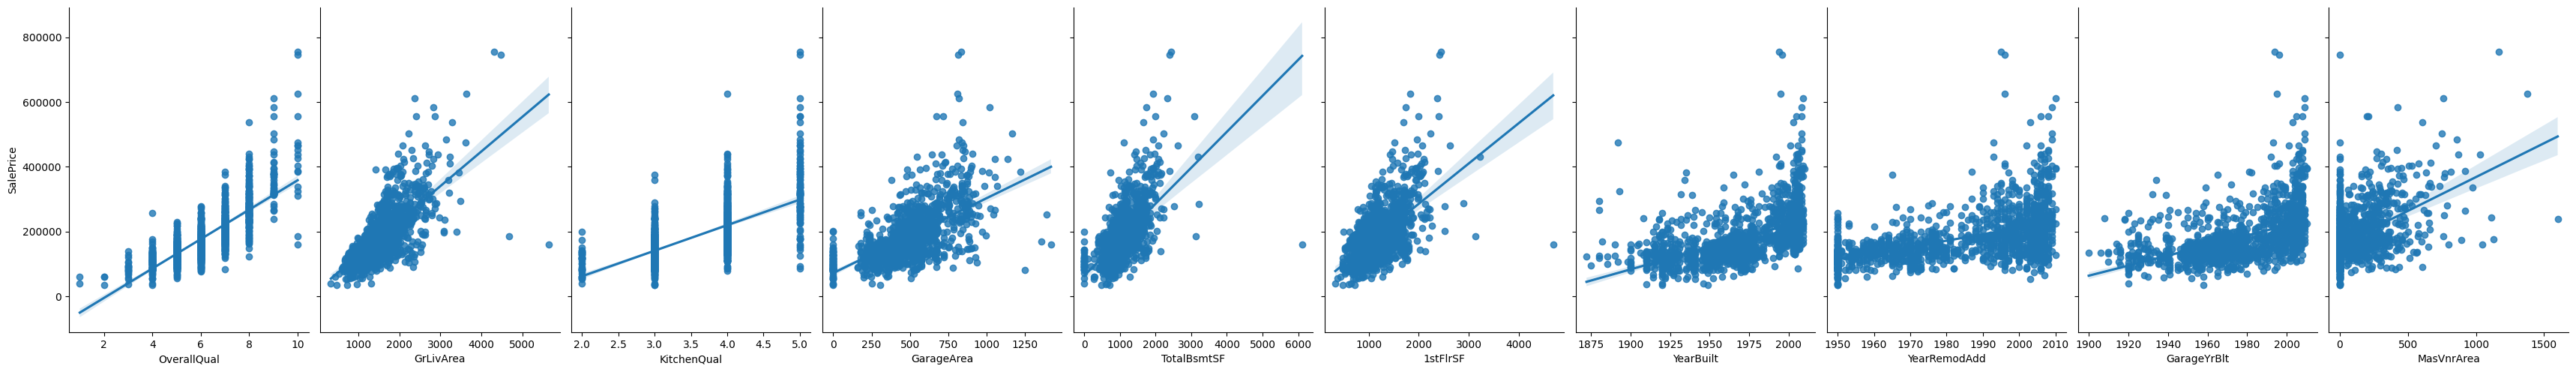

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

top_10 = saleprice_corr.index[1:11] # Exclude SalePrice itself 
sns.pairplot(df, x_vars=top_10, y_vars='SalePrice', kind='reg', height=5, aspect=0.7) 
plt.show()

we have used PairPlot to visualise the top 10 variables that correlate well with SalesPrice

Now we will look at the Persson correlation method - Do the results confirm the correlation study?

In [28]:
pearson_corr_matrix = df.corr(method='pearson') 
pearson_saleprice_corr = pearson_corr_matrix['SalePrice'].sort_values(ascending=False) 

# Display the most correlated variables 
print("Pearson Correlation with SalePrice:") 
print(pearson_saleprice_corr.head(11))

Pearson Correlation with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64


And now the Spearman method

In [29]:
spearman_corr_matrix = df.corr(method='spearman')
spearman_saleprice_corr = spearman_corr_matrix['SalePrice'].sort_values(ascending=False)

 # Display the most correlated variables 
print("Spearman Correlation with SalePrice:") 
print(spearman_saleprice_corr.head(11))

Spearman Correlation with SalePrice:
SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
Name: SalePrice, dtype: float64


Lets compare the two

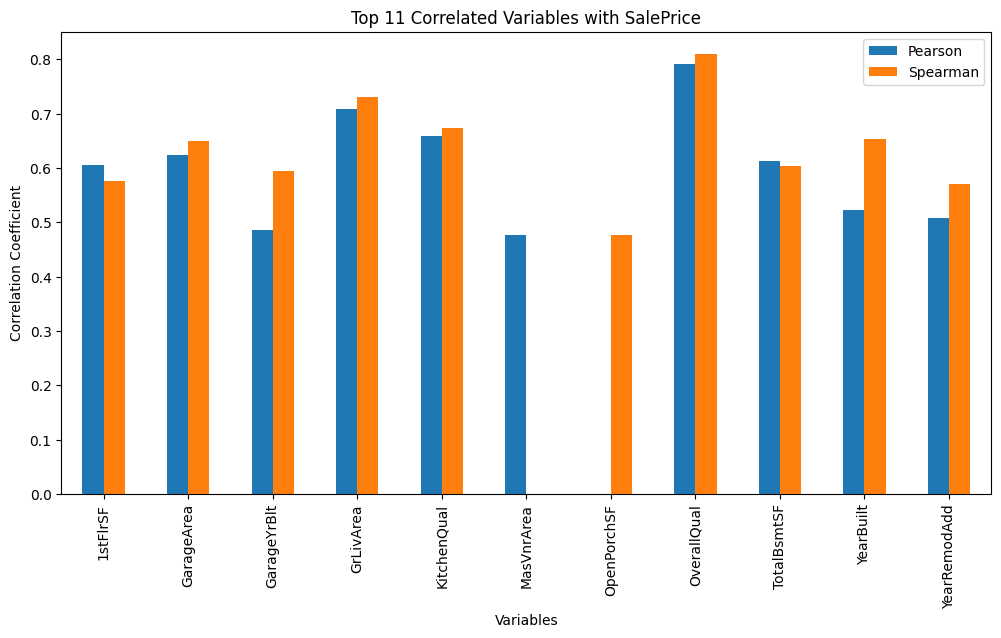

In [30]:
# Select the top 10 correlated variables for both methods 
top_10_pearson = pearson_saleprice_corr.index[1:11] 
top_10_spearman = spearman_saleprice_corr.index[1:11] 

# Create DataFrame for plotting
top_10_df = pd.DataFrame({ 
    'Pearson': pearson_saleprice_corr[top_10_pearson], 
    'Spearman': spearman_saleprice_corr[top_10_spearman] 
}) 

# Plot bar plots 
top_10_df.plot(kind='bar', figsize=(12, 6)) 
plt.title('Top 11 Correlated Variables with SalePrice') 
plt.ylabel('Correlation Coefficient') 
plt.xlabel('Variables') 
plt.show()

Lets narrow this down to consider only the top 6 factors

In [31]:
top_n = 7
set(pearson_saleprice_corr[:top_n].index.to_list() + spearman_saleprice_corr[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'SalePrice',
 'TotalBsmtSF',
 'YearBuilt'}

In [32]:
# We will ignore Sale price as that then goes into another realm of weird. Like luxury goods and brands. Thats stuff is confusing. 

vars_to_study = ['GarageArea', 'GrLivArea', 'KitchenQual', 'OverallQual', '1stFlrSF', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 '1stFlrSF',
 'TotalBsmtSF',
 'YearBuilt']

## EDA on selected variables

In [33]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(10)

,GarageArea,GrLivArea,KitchenQual,OverallQual,1stFlrSF,TotalBsmtSF,YearBuilt,SalePrice
0,548,1710,4,7,856,856,2003,208500
1,460,1262,3,6,1262,1262,1976,181500
2,608,1786,4,7,920,920,2001,223500
3,642,1717,4,7,961,756,1915,140000
4,836,2198,4,8,1145,1145,2000,250000
5,480,1362,3,5,796,796,1993,143000
6,636,1694,4,8,1694,1686,2004,307000
7,484,2090,3,7,1107,1107,1973,200000
8,468,1774,3,7,1022,952,1931,129900
9,205,1077,3,5,1077,991,1939,118000


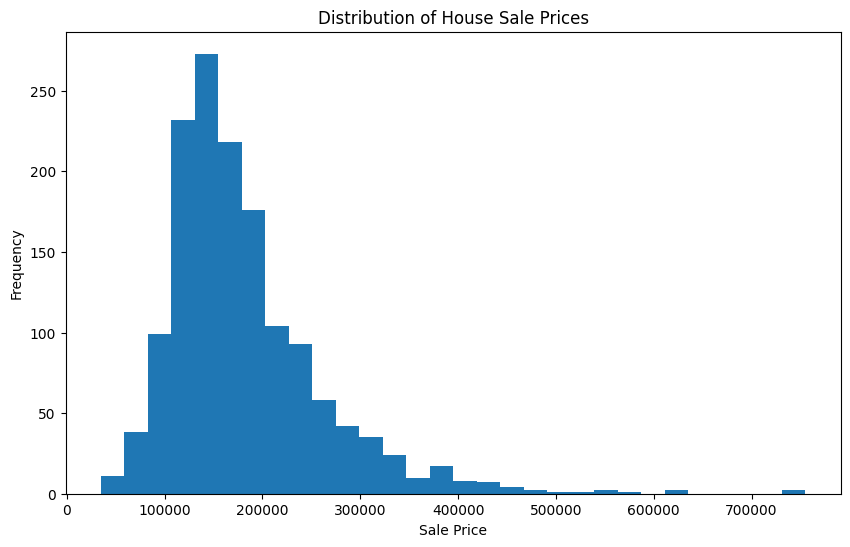

In [34]:
import matplotlib.pyplot as plt

# histogram of SalePrice
plt.figure(figsize=(10, 6))
plt.hist(df_eda['SalePrice'], bins=30)
plt.title('Distribution of House Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


Looking at the Histogram above, there are some observations: 
* The distrabution shows a clear right skew (positive skew) pattern. 
* The majority of houses are between 100,000 and 300,000
* There are some outliers above 500,000

In [35]:
# Remove rows with NaN values in SalePrice
df_eda_clean = df_eda.dropna(subset=['SalePrice'])

# Calculate statistical outliers using IQR method on the cleaned data
Q1_clean = df_eda_clean['SalePrice'].quantile(0.25)
Q3_clean = df_eda_clean['SalePrice'].quantile(0.75)
IQR_clean = Q3_clean - Q1_clean
lower_bound_clean = Q1_clean - 1.5 * IQR_clean
upper_bound_clean = Q3_clean + 1.5 * IQR_clean

# Print outliers
print("\nOutlier Boundaries (Cleaned Data):")
print(f"Lower bound: ${lower_bound_clean:,.2f}")
print(f"Upper bound: ${upper_bound_clean:,.2f}")

# Show number of outliers
outliers_clean = df_eda_clean[df_eda_clean['SalePrice'] > upper_bound_clean]['SalePrice']
print(f"\nNumber of outliers: {len(outliers_clean)}")
print("\nOutlier values:")
print(outliers_clean.sort_values(ascending=False).head())



Outlier Boundaries (Cleaned Data):
Lower bound: $3,937.50
Upper bound: $340,037.50

Number of outliers: 61

Outlier values:
691     755000
1182    745000
1169    625000
898     611657
803     582933
Name: SalePrice, dtype: int64


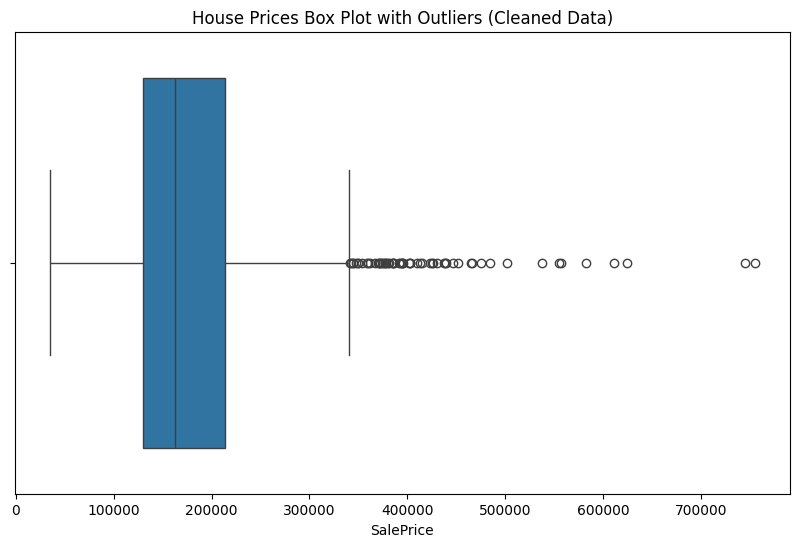

In [36]:
# Box plot for cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_eda_clean['SalePrice'])
plt.title('House Prices Box Plot with Outliers (Cleaned Data)')
plt.show()


These outliers could influence the data as they could be luxury properties. 

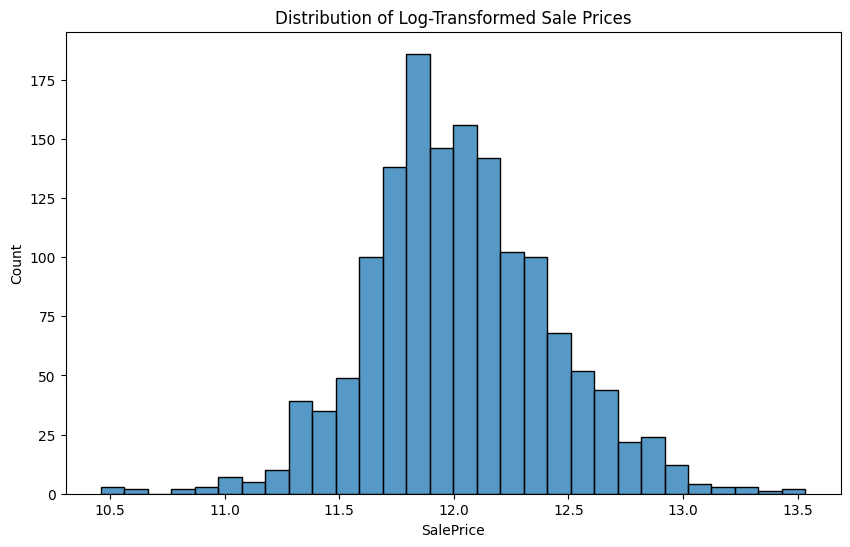

In [37]:
import numpy as np

# Log transformation often works well for price data
df_eda['SalePrice'] = np.log1p(df_eda['SalePrice'])

# Plot the transformed data
plt.figure(figsize=(10, 6))
sns.histplot(data=df_eda, x='SalePrice', bins=30)
plt.title('Distribution of Log-Transformed Sale Prices')
plt.show()

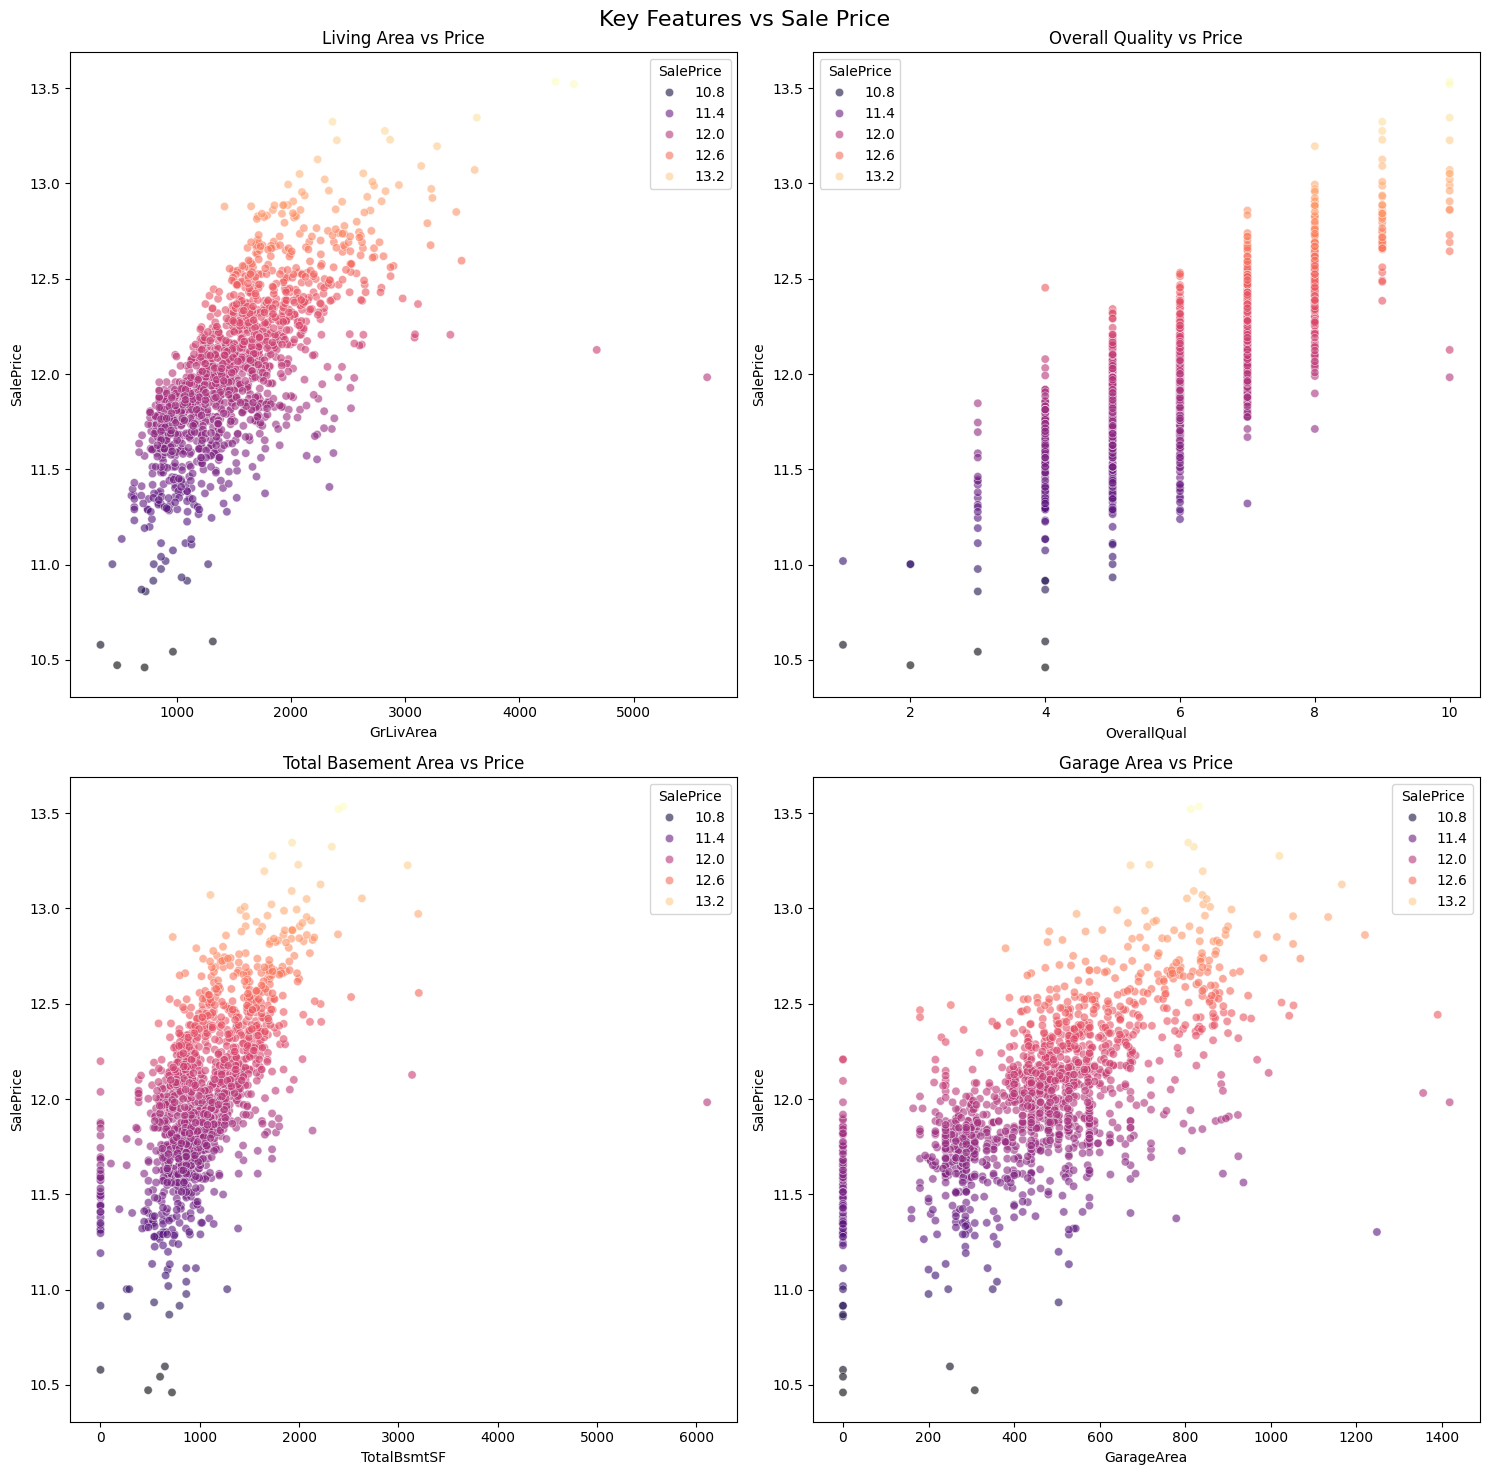

In [38]:
# Create subplots for top relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Key Features vs Sale Price', fontsize=16)

# Plot 1
sns.scatterplot(data=df_eda, x='GrLivArea', y='SalePrice', hue='SalePrice', palette='magma', alpha=0.6, ax=axes[0,0])
axes[0,0].set_title('Living Area vs Price')

# Plot 2
sns.scatterplot(data=df_eda, x='OverallQual', y='SalePrice', hue='SalePrice', palette='magma', alpha=0.6, ax=axes[0,1])
axes[0,1].set_title('Overall Quality vs Price')

# Plot 3
sns.scatterplot(data=df_eda, x='TotalBsmtSF', y='SalePrice', hue='SalePrice', palette='magma', alpha=0.6, ax=axes[1,0])
axes[1,0].set_title('Total Basement Area vs Price')

# Plot 4
sns.scatterplot(data=df_eda, x='GarageArea', y='SalePrice', hue='SalePrice', palette='magma', alpha=0.6, ax=axes[1,1])
axes[1,1].set_title('Garage Area vs Price')

plt.tight_layout()
plt.show()

We can see that the variables selected correlate well with the increased sales prices.

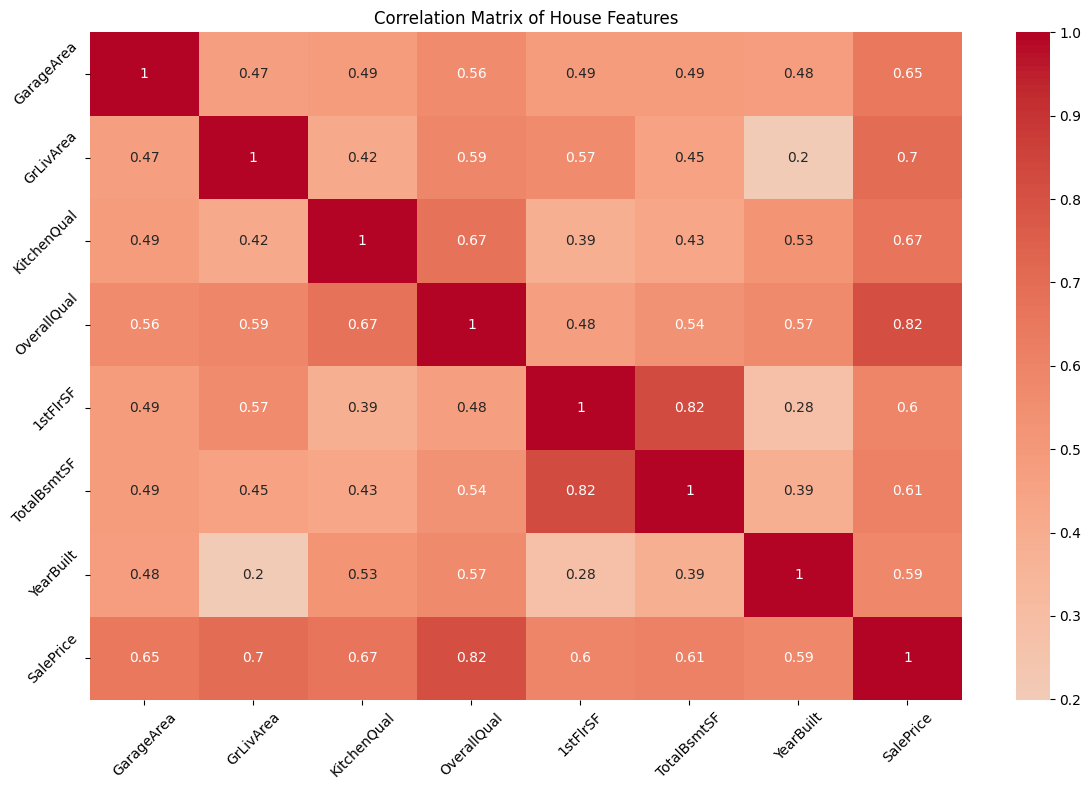

In [39]:
# Create correlation heatmap for all selected variables
plt.figure(figsize=(12, 8))
correlation_matrix = df_eda[['GarageArea', 'GrLivArea', 'KitchenQual', 'OverallQual', 
                            '1stFlrSF', 'TotalBsmtSF', 'YearBuilt', 'SalePrice']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of House Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

---

NOTE

* We have narrowed down the variables from 25 columns to 7 columns with the Sales Price as the Target. 

---

# Conclusions and next steps

* The upper and lower bounds: 
  * Lower bound: $3,937.50
  * Upper bound: $340,037.50
* Houses that sell for higher prices have: 
  * A garage area
  * A large above ground area 
  * Good kitchen quality
  * The overall quality of the house is good
  * Has or is on the first floor 
  * Has a basement, the larger the basement the better
  * The year the building was built is a unique factor

Next we will use this information to predict the housing price of the 4 inherited homes to answer business requirement 2. 